In [2]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time
import tkinter
import tkinter.messagebox

In [3]:
lbl = ["Close", "Open"]

In [24]:
model = load_model("./models/cnnCat2.h5")
yawn2 = load_model("./models/yawn.h5")

In [13]:
face = cv2.CascadeClassifier("./cascade/haarcascade_frontalface_alt.xml")
leye = cv2.CascadeClassifier("./cascade/haarcascade_lefteye_2splits.xml")
reye = cv2.CascadeClassifier("./cascade/haarcascade_righteye_2splits.xml")

In [14]:
mixer.init()
sound = mixer.Sound("bell2.wav")

In [17]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 39ms/step
[[0.01505182 0.9849482 ]]
1/1 [==============================] - 0s 31ms/step
1 1 1


QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread (0x8845650).
Cannot move to target thread (0x871c980)

QObject::moveToThread: Current thread (0x871c980) is not the object's thread

1/1 [==============================] - 0s 39ms/step
[[0.00738198 0.992618  ]]
1/1 [==============================] - 0s 23ms/step
1 1 1
1/1 [==============================] - 0s 48ms/step
[[0.2911217  0.70887834]]
1/1 [==============================] - 0s 24ms/step
1 1 1
1/1 [==============================] - 0s 31ms/step
[[0.5494454  0.45055458]]
1/1 [==============================] - 0s 25ms/step
1 1 0
1/1 [==============================] - 0s 40ms/step
[[0.00134317 0.99865675]]
1/1 [==============================] - 0s 26ms/step
1 1 1
1/1 [==============================] - 0s 37ms/step
[[0.84969044 0.15030955]]
1/1 [==============================] - 0s 24ms/step
1 1 0
1/1 [==============================] - 0s 40ms/step
[[0.22846542 0.7715346 ]]
1/1 [==============================] - 0s 38ms/step
1 1 1
1/1 [==============================] - 0s 35ms/step
[[0.00102114 0.99897885]]
1/1 [==============================] - 0s 25ms/step
1 1 1
1/1 [==============================] - 0s 34ms/s

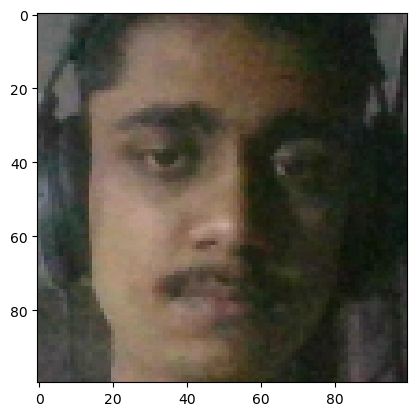

In [26]:
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count = 0
score = 0
thicc = 2
rpred = 1
lpred = 1
face_pred=0

while True:
    ret, frame = cap.read()
    height, width = frame.shape[:2]

    rpred = 1
    lpred = 1
    face_pred=0
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face.detectMultiScale(
        gray, minNeighbors=5, scaleFactor=1.1, minSize=(25, 25)
    )
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)

    cv2.rectangle(
        frame, (0, height - 100), (200, height), (0, 0, 0), thickness=cv2.FILLED
    )

    for x, y, w, h in faces:
        f = frame[y : y + h, x : x + w]
        f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 100, 100), 1)
        f = cv2.resize(f,(100,100))
        f = f/255.
        f = f.reshape(100,100,-1)

        face_pred = yawn2.predict(np.asarray([f]))[0].argmax()

    for x, y, w, h in right_eye:
        r_eye = frame[y : y + h, x : x + w]
        # r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2RGB)
        count = count + 1
        r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye, (24, 24))
        r_eye = r_eye / 255.
        r_eye = r_eye.reshape(24, 24, -1)
        r_eye = np.expand_dims(r_eye, axis=0)
        rpred = model.predict(r_eye)[0].argmax()
        # if (rpred == 1).any():
        #     lbl = "Open"
        # if (rpred == 0).any():
        #     lbl = "Closed"
        break

    for x, y, w, h in left_eye:
        l_eye = frame[y : y + h, x : x + w]
        # l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2RGB)
        count = count + 1
        l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2GRAY)
        l_eye = cv2.resize(l_eye, (24, 24))
        l_eye = l_eye / 255.
        l_eye = l_eye.reshape(24, 24, -1)
        l_eye = np.expand_dims(l_eye, axis=0)
        lpred = model.predict(l_eye)[0].argmax()
        # if (lpred == 1).any():
        #     lbl = "Open"
        # if (lpred == 0).any():
        #     lbl = "Closed"
        break
        
    if(rpred==1 and lpred==1):
        score = score - 1
        cv2.putText(
            frame, "Open", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA
        )
    else:
        score = score + 1
        cv2.putText(
            frame, "Closed", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA
        )
    if(face_pred==1):
        cv2.putText(
            frame, "Sleepy", (10, height - 50), font, 1, (255, 255, 255), 1, cv2.LINE_AA
        )

    if score < 0:
        score = 0
    if score >30:
        score=30
    cv2.putText(
        frame,
        "Score:" + str(score),
        (100, height - 20),
        font,
        1,
        (255, 255, 255),
        1,
        cv2.LINE_AA,
    )
    if score > 20:
        # tkinter.messagebox.showinfo(title="Danger", message="Alert!!! Drowsiness Detected")
        cv2.putText(
            frame,
            "Wake up!!!",
            (10, height - 50),
            font,
            1,
            (255, 255, 255),
            1,
            cv2.LINE_AA,
        )
        cv2.imwrite(os.path.join(path, "image.jpg"), frame)
        try:
            sound.play()

        except:  # isplaying = False
            pass
        if thicc < 16:
            thicc = thicc + 4
        else:
            thicc = thicc - 4
            if thicc < 4:
                thicc = 4
        cv2.rectangle(frame, (0, 0), (width, height), (0, 0, 255), thicc)
    cv2.imshow("Drowsiness Detection System", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
cap.release()